In [ ]:
from google.colab import files
uploades=files.upload()

Saving archive (3).zip to archive (3).zip


In [ ]:
!unzip "archive (3).zip"

Archive:  archive (3).zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  inflating

In [ ]:
!ls

'archive (3).zip'   flowers  'New Folder'   sample_data


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        'flowers/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='training',
        classes=['daisy', 'sunflower'])

Found 1199 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
        'flowers/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='validation',
        classes=['daisy', 'sunflower'])

Found 298 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
37/37 [==============================] - 64s 2s/step - loss: 0.5461 - accuracy: 0.7266 - val_loss: 0.3246 - val_accuracy: 0.8611
Epoch 2/10
37/37 [==============================] - 60s 2s/step - loss: 0.3038 - accuracy: 0.8783 - val_loss: 0.2955 - val_accuracy: 0.8819
Epoch 3/10
37/37 [==============================] - 61s 2s/step - loss: 0.2705 - accuracy: 0.8972 - val_loss: 0.2947 - val_accuracy: 0.8958
Epoch 4/10
37/37 [==============================] - 62s 2s/step - loss: 0.2641 - accuracy: 0.8980 - val_loss: 0.3534 - val_accuracy: 0.8472
Epoch 5/10
37/37 [==============================] - 61s 2s/step - loss: 0.2684 - accuracy: 0.8937 - val_loss: 0.2353 - val_accuracy: 0.9271
Epoch 6/10
37/37 [==============================] - 61s 2s/step - loss: 0.2386 - accuracy: 0.9109 - val_loss: 0.2750 - val_accuracy: 0.9097
Epoch 7/10
37/37 [==============================] - 66s 2s/step - loss: 0.1887 - accuracy: 0.9177 - val_loss: 0.2911 - val_accuracy: 0.8819
Epoch 8/10
37/37 [==

In [ ]:
model.save('trained_model_flowers.h5')

In [ ]:
model.save('trained_model_flowers.h5')

In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Load and preprocess the image using OpenCV
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    img = img.astype("float") / 255.0
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

In [ ]:
# Function to display image using OpenCV
def display_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

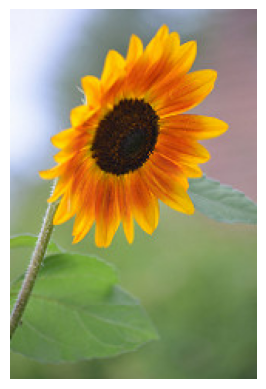

1/1 [==============================] - 0s 226ms/step


In [ ]:
# Testing the model with a sample image (sunflower)
sample_image_path = 'flowers/sunflower/9558627290_353a14ba0b_m.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)

In [ ]:
# prediction
if prediction < 0.5:
    print("Sunflower")
else:
    print("Daisy")

Sunflower


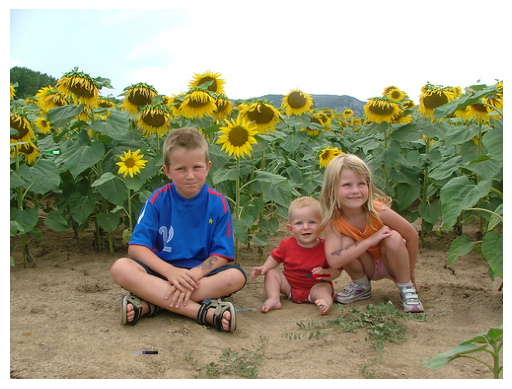

1/1 [==============================] - 0s 54ms/step


In [ ]:
# Again Testing the model with a sample image (sunflower)
sample_image_path = 'flowers/sunflower/215798357_3f4bfa27b7.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)

In [ ]:
# prediction
if prediction > 0.5:
    print("Sunflower")
else:
    print("Daisy")

Sunflower


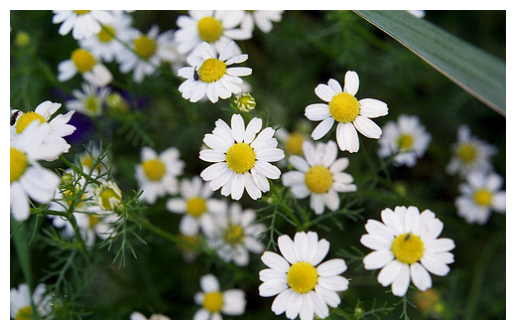

1/1 [==============================] - 0s 43ms/step


In [ ]:
# Testing the model with a sample image(daisy)
sample_image_path = 'flowers/daisy/6210664514_f1d211217a.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)

In [ ]:
# prediction
if prediction > 0.5:
    print("Sunflower")
else:
    print("Daisy")

Daisy


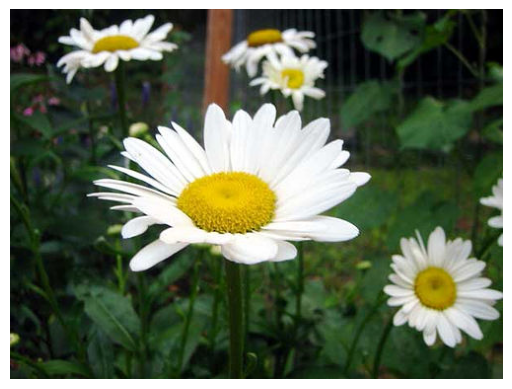

1/1 [==============================] - 0s 39ms/step


In [ ]:
# Again Testing the model with a sample image
sample_image_path = 'flowers/daisy/25360380_1a881a5648.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)

In [ ]:
# prediction
if prediction > 0.5:
    print("Sunflower")
else:
    print("Daisy")

Daisy


In [ ]:
model.save('trained_model_flowers.h5')